# **Partie 2: Modèle de prédiction(TARGET)**

#

## **Sommaire**

#### **I - Description génerale des données**

1.1 - Importation les différentes librairie necessaire

1.2 - Installation des logiciels necessaire

1.3 - Charger la base de donnée totale

1.4 - Encodage des variables catégorielles

#### **II - Construire le modèle de prédiction**

**1- Regression Logistique**

1.1 Modelisation

1.2 Amélioration du Modèle(régression logistique): Equilibrage des classes(SMOTE)

1.3 conclusion

**2. Modélisation de l'arbre de classification**

2.1 Arbre de decision

2.2 Optimisation de l'arbre de décision

2.3 conclusion

**3. Forêt Aléatoire**

3.1 Modèle RandomForetclassifier

3.2 Amélioration du modèle en rééquilibrant les classes(Méthode SMOTE)

3.3 conclusion


**4. Light Gradient Boosted Machine(LightGBM)**

4.1 Modèle sans optimisation

4.2 Equilibrage des classes dans le modèle(SMOTE)

4.3 Enregistrment du modèle lightGBM

4.4 conclusion

**5. Modèle XGBoost**

5.1 Modele sans optimisation

5.2 Equilibrage des classes(SMOTE)

5.3 conclusion





###

#

### **I- Description génerale des données**

#### 1.1 - Importation les différentes librairie necessaire

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import timeit
#import shap

from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score, recall_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport

#### 1.2 - Installation des logiciels necessaire

#### 1.3 - Charger la base de donnée d'entrainement et de test

In [32]:
# from google.colab import drive
# drive.mount('/content/drive')

path_test = r"C:\Users\HP\Documents\projet 7\P7\modele\data\TEST_03.csv"
path_train = r"C:\Users\HP\Documents\projet 7\P7\modele\data\TRAIN_03.csv"

In [33]:
# transformation en dataframe
df_test = pd.read_csv(path_test)
df_trainBRUTE = pd.read_csv(path_train)

In [34]:
df_trainBRUTE = df_trainBRUTE.rename(columns={"sign_in_prêt": "souscription_au_pret"})
df_trainBRUTE.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,categorie_enfants,INTERVAL_age_client,company_seniority_year,souscription_au_pret,update_ID,Population_Segment,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,Unaccompanied,...,0-1,31 et moins,1 - 3 ans,8 - 12 ans,4 - 7 ans,Moyenne,2.007889,0.121978,0.060749,0.076923
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,Family,...,0-1,43 - 50 ans,1 - 3 ans,3 an et moins,4 ans et moins,Très faible,4.790750,0.132217,0.027598,0.065217
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,Unaccompanied,...,0-1,50 - 58 ans,1 an et moins,8 - 12 ans,4 - 7 ans,Faible,2.000000,0.100000,0.050000,0.019231
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,Unaccompanied,...,0-1,50 - 58 ans,6 - 10 ans,Plus de 24 ans,4 - 7 ans,Très faible,2.316167,0.219900,0.094941,0.153846
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,Unaccompanied,...,0-1,50 - 58 ans,6 - 10 ans,8 - 12 ans,7 - 11 ans,Élevée,4.222222,0.179963,0.042623,0.145455


In [35]:
df_trainBRUTE.shape

(307511, 51)

In [36]:
df_test = df_test.rename(columns={"sign_in_prêt": "souscription_au_pret"})
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,categorie_enfants,INTERVAL_age_client,company_seniority_year,souscription_au_pret,update_ID,Population_Segment,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT
0,100001,Cash loans,F,N,Y,135000.0,568800.0,20560.5,Unaccompanied,Employé,...,0-1,50 - 58 ans,3 - 6 ans,12 - 17 ans,4 ans et moins,Moyenne,4.213333,0.152300,0.036147,0.113208
1,100005,Cash loans,M,N,Y,99000.0,222768.0,17370.0,Unaccompanied,Employé,...,0-1,43 - 50 ans,Plus de 10 ans,Plus de 24 ans,4 - 7 ans,Très élévée,2.250182,0.175455,0.077973,0.244898
2,100013,Cash loans,M,Y,Y,202500.0,663264.0,69777.0,Unaccompanied,Employé,...,0-1,50 - 58 ans,Plus de 10 ans,3 - 8 ans,7 - 11 ans,Moyenne,3.275378,0.344578,0.105202,0.218182
3,100028,Cash loans,F,N,Y,315000.0,1575000.0,49018.5,Unaccompanied,Employé,...,1-2,37 - 43 ans,3 - 6 ans,3 - 8 ans,11 - 12 ans,Élevée,5.000000,0.155614,0.031123,0.131579
4,100038,Cash loans,M,Y,N,180000.0,625500.0,32067.0,Unaccompanied,Employé,...,1-2,31 - 37 ans,3 - 6 ans,8 - 12 ans,11 - 12 ans,Faible,3.475000,0.178150,0.051266,0.166667


In [37]:
df_test.shape

(48744, 50)

### 1.4 - Encodage des variables catégorielles

**1.4.1- Variables catégorielles ordinaire**

####  <span style="color: blue;"> **Entrainement** </span>

In [38]:
# Liste des variables ordinales
variables_ordinales = [
                        "REGION_RATING_CLIENT_W_CITY",
                        "REGION_RATING_CLIENT",
                        "Population_Segment",
                        "update_ID",
                        "souscription_au_pret",
                        "company_seniority_year",
                        "INTERVAL_age_client",
                        "categorie_enfants",
                        "NAME_EDUCATION_TYPE"
                      ]
# catégories associés aux variables
categories = [
                ["Pire notation", "Notation intermédiaire", "Meilleure notation"],
                ["Pire notation", "Notation intermédiaire" , "Meilleure notation"],
                ["Très faible", "Faible", "Moyenne","Élevée","Très élévée"],
                ["4 ans et moins", "4  - 7 ans", "7 - 11 ans", "11 - 12 ans","Plus de 12 ans"],
                ["3 an et moins", "3  - 8 ans", "8 - 12 ans","12 - 17 ans","17 - 24 ans","Plus de 24 ans"],
                ["1 an et moins", "1 - 3 ans", "3 - 6 ans","6 - 10 ans","Plus de 10 ans"],
                ["31 et moins", "31 - 37 ans", "37 - 43 ans","43 - 50 ans","50 - 58 ans","58 - 69 ans"],
                ["0-1", "1-2", "2-3","4+"],
                ["Lower secondary", "Secondary / secondary special", "Incomplete higher", "Higher education", "Academic degree"]
            ]

# Instanciation de l'OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Appliquer l'encodage sur les colonnes ordinales
df_trainBRUTE[variables_ordinales] = ordinal_encoder.fit_transform(df_trainBRUTE[variables_ordinales])

####  <span style="color: blue;"> **TEST** </span>

In [39]:
# Liste des variables ordinales
variables_ordinales = [
                        "REGION_RATING_CLIENT_W_CITY",
                        "REGION_RATING_CLIENT",
                        "Population_Segment",
                        "update_ID",
                        "souscription_au_pret",
                        "company_seniority_year",
                        "INTERVAL_age_client",
                        "categorie_enfants",
                        "NAME_EDUCATION_TYPE"
                      ]
# catégories associés aux variables
categories = [
                ["Pire notation", "Notation intermédiaire", "Meilleure notation"],
                ["Pire notation", "Notation intermédiaire" , "Meilleure notation"],
                ["Très faible", "Faible", "Moyenne","Élevée","Très élévée"],
                ["4 ans et moins", "4  - 7 ans", "7 - 11 ans", "11 - 12 ans","Plus de 12 ans"],
                ["3 an et moins", "3  - 8 ans", "8 - 12 ans","12 - 17 ans","17 - 24 ans","Plus de 24 ans"],
                ["1 an et moins", "1 - 3 ans", "3 - 6 ans","6 - 10 ans","Plus de 10 ans"],
                ["31 et moins", "31 - 37 ans", "37 - 43 ans","43 - 50 ans","50 - 58 ans","58 - 69 ans"],
                ["0-1", "1-2", "2-3","4+"],
                ["Lower secondary", "Secondary / secondary special", "Incomplete higher", "Higher education", "Academic degree"]
            ]

# Instanciation de l'OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=categories)

# Appliquer l'encodage sur les colonnes ordinales
df_test[variables_ordinales] = ordinal_encoder.fit_transform(df_test[variables_ordinales])

#### **1.4.2- Variables catégorielles nominales**

####  <span style="color: blue;"> **Entrainement** </span>

In [40]:
variables_nominales = ["WEEKDAY_APPR_PROCESS_START","NAME_HOUSING_TYPE","NAME_FAMILY_STATUS","NAME_INCOME_TYPE",
                       "FLAG_OWN_CAR","CODE_GENDER","NAME_CONTRACT_TYPE","FLAG_OWN_REALTY","OCCUPATION_TYPE","EMERGENCYSTATE_MODE",
                      "NAME_TYPE_SUITE"]

# Appliquer One-Hot Encoding
train_encoded = pd.get_dummies(df_trainBRUTE, columns=variables_nominales, drop_first=True)

In [41]:
train_encoded.head()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_Yes,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,100002,1,202500.0,406597.5,24700.5,1.0,26.0,2.0,0,1,...,False,False,False,False,False,False,False,False,False,True
1,100003,0,270000.0,1293502.5,35698.5,3.0,46.0,3.0,0,1,...,False,False,False,False,True,False,False,False,False,False
2,100004,0,67500.0,135000.0,6750.0,1.0,52.0,1.0,1,1,...,False,False,False,False,False,False,False,False,False,True
3,100006,0,135000.0,312682.5,29686.5,1.0,52.0,8.0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,100007,0,121500.0,513000.0,21865.5,1.0,55.0,8.0,0,0,...,False,False,False,False,False,False,False,False,False,True


####  <span style="color: blue;"> **TEST** </span>

In [42]:
variables_nominales = ["WEEKDAY_APPR_PROCESS_START","NAME_HOUSING_TYPE","NAME_FAMILY_STATUS","NAME_INCOME_TYPE",
                       "FLAG_OWN_CAR","CODE_GENDER","NAME_CONTRACT_TYPE","FLAG_OWN_REALTY","OCCUPATION_TYPE","EMERGENCYSTATE_MODE",
                      "NAME_TYPE_SUITE"
                      ]

# Appliquer One-Hot Encoding
test_encoded = pd.get_dummies(df_test, columns=variables_nominales, drop_first=True)

In [43]:
test_encoded.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_Yes,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,100001,135000.0,568800.0,20560.5,3.0,53.0,6.0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,True
1,100005,99000.0,222768.0,17370.0,1.0,49.0,12.0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,True
2,100013,202500.0,663264.0,69777.0,3.0,55.0,12.0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,True
3,100028,315000.0,1575000.0,49018.5,1.0,38.0,5.0,0,1,4.0,...,False,False,False,False,False,False,False,False,False,True
4,100038,180000.0,625500.0,32067.0,1.0,36.0,6.0,1,0,3.0,...,False,False,False,False,False,False,False,False,False,True


### **Les variables "CODE_GENDER_XNA","NAME_FAMILY_STATUS_Unknown", sont des variables soient inconnus, soient manquantes, autrement dit elle ne nous donne pas suffisament d'information, raison pour laquelle elles seront supprimées.**

In [44]:
# On supprime les variables inutiles
train_encoded = train_encoded.drop(columns=["CODE_GENDER_XNA","NAME_FAMILY_STATUS_Unknown"], axis = 1)
# suppression des identifiants
train_encoded = train_encoded.drop("SK_ID_CURR", axis=1)
test_encoded = test_encoded.drop("SK_ID_CURR", axis=1)
train_encoded.shape, test_encoded.shape

((307511, 84), (48744, 83))

## **2- Imputation des valeurs manquantes**

###  <span style="color: blue;"> **Entrainement** </span>

In [45]:
train_imputation = train_encoded
# Détection des colonnes contenant des valeurs manquantes
missing_cols = train_imputation.columns[train_imputation.isnull().any()]

# Imputation par la médiane uniquement pour les colonnes numériques
for col in missing_cols:
    if train_imputation[col].dtype in ['int64', 'float64']:  # Vérification si colonne numérique
        median_value = train_imputation[col].median()
        train_imputation[col].fillna(median_value, inplace=True)

train_imputation

C:\Users\HP\AppData\Local\Temp\ipykernel_17236\2355664626.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_imputation[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17236\2355664626.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_Yes,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,1,202500.0,406597.5,24700.5,1.0,26.0,2.0,0,1,1.0,...,False,False,False,False,False,False,False,False,False,True
1,0,270000.0,1293502.5,35698.5,3.0,46.0,3.0,0,1,2.0,...,False,False,False,False,True,False,False,False,False,False
2,0,67500.0,135000.0,6750.0,1.0,52.0,1.0,1,1,1.0,...,False,False,False,False,False,False,False,False,False,True
3,0,135000.0,312682.5,29686.5,1.0,52.0,8.0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,True
4,0,121500.0,513000.0,21865.5,1.0,55.0,8.0,0,0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,1.0,26.0,1.0,0,0,1.0,...,False,False,False,False,False,False,False,False,False,True
307507,0,72000.0,269550.0,12001.5,1.0,57.0,-1001.0,0,1,1.0,...,False,False,False,False,False,False,False,False,False,True
307508,0,153000.0,677664.0,29979.0,3.0,41.0,22.0,0,0,1.0,...,False,False,False,False,False,False,False,False,False,True
307509,1,171000.0,370107.0,20205.0,1.0,33.0,13.0,0,0,2.0,...,False,False,False,False,False,False,False,False,False,True


In [46]:
print(train_encoded.columns.to_list())

['TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_EDUCATION_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_8', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'categorie_enfants', 'INTERVAL_age_client', 'company_seniority_year', 'souscription_au_pret', 'update_ID', 'Population_Segment', 'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT', 'WEEKDAY_APPR_PROCESS_START_MONDAY', 'WEEKDAY_APPR_PROCESS_START_SATURDAY', 'WEEKDAY_APPR_PROCESS_START_SUNDAY', 'WEEKDAY_APPR_PROC

In [47]:
# Enregistrer en CSV
# train_encoded.to_csv(r"/Users/gassuccedric/Documents/P77/Deploiement_Projet7/modele/notebook/train_tracking.csv", index=False)

In [48]:
train_imputation.isnull().sum()

TARGET                             0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_EDUCATION_TYPE                0
                                  ..
NAME_TYPE_SUITE_Group of people    0
NAME_TYPE_SUITE_Other_A            0
NAME_TYPE_SUITE_Other_B            0
NAME_TYPE_SUITE_Spouse, partner    0
NAME_TYPE_SUITE_Unaccompanied      0
Length: 84, dtype: int64

####  <span style="color: blue;"> **TEST** </span>

In [49]:
test_imputation = test_encoded
# Détection des colonnes contenant des valeurs manquantes
missing_cols = test_imputation.columns[test_imputation.isnull().any()]

# Imputation par la médiane uniquement pour les colonnes numériques
for col in missing_cols:
    if test_imputation[col].dtype in ['int64', 'float64']:  # Vérification si colonne numérique
        median_value = test_imputation[col].median()
        test_imputation[col].fillna(median_value, inplace=True)

test_imputation

C:\Users\HP\AppData\Local\Temp\ipykernel_17236\4041054625.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_imputation[col].fillna(median_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17236\4041054625.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,EMERGENCYSTATE_MODE_Yes,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied
0,135000.0,568800.0,20560.5,3.0,53.0,6.0,0,0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,True
1,99000.0,222768.0,17370.0,1.0,49.0,12.0,0,0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,True
2,202500.0,663264.0,69777.0,3.0,55.0,12.0,0,0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,True
3,315000.0,1575000.0,49018.5,1.0,38.0,5.0,0,1,4.0,1.0,...,False,False,False,False,False,False,False,False,False,True
4,180000.0,625500.0,32067.0,1.0,36.0,6.0,1,0,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,121500.0,412560.0,17473.5,1.0,55.0,14.0,1,1,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
48740,157500.0,622413.0,31909.5,1.0,31.0,3.0,0,0,4.0,1.0,...,False,False,False,False,False,False,False,False,False,True
48741,202500.0,315000.0,33205.5,1.0,44.0,8.0,0,1,3.0,1.0,...,False,False,False,False,False,False,False,False,False,True
48742,225000.0,450000.0,25128.0,3.0,38.0,7.0,1,1,2.0,1.0,...,False,False,False,False,True,False,False,False,False,False


In [50]:
# Enregistrer en CSV
#test_encoded.to_csv(r"/Users/gassuccedric/Documents/P77/Deploiement_Projet7/modele/notebook/test_tracking.csv", index=False)

In [51]:
test_encoded.isnull().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
NAME_EDUCATION_TYPE                0
DAYS_BIRTH                         0
                                  ..
NAME_TYPE_SUITE_Group of people    0
NAME_TYPE_SUITE_Other_A            0
NAME_TYPE_SUITE_Other_B            0
NAME_TYPE_SUITE_Spouse, partner    0
NAME_TYPE_SUITE_Unaccompanied      0
Length: 83, dtype: int64

In [52]:
test_imputation.shape, train_imputation.shape

((48744, 83), (307511, 84))

In [53]:
train_imputation.to_csv("TRAIN_chat.csv", index = False)

#

## **II - Modèle de prédiction**

#### A- Etapes de prédiction de la variable cible"TARGET"

#### Ces données seront divivées en deux parties: données d'entraiment et de validation avec un rapport de 70% et 30% vu le volume de donnée.

- **Données d'entrée**

In [54]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64

- **Normalise les données**

In [55]:
# on normalise les données
scaler = preprocessing.StandardScaler().fit(X)
X_scaler = scaler.transform(X)
scaler = preprocessing.StandardScaler().fit(test_encoded)
X_test = scaler.transform(test_encoded)

- **Divisons les données d'entrainement brute en deux partie: Entrainement et Validations**

In [56]:
# Division en ensemble d'entraînement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X_scaler, y, test_size=0.2, random_state=42, stratify=y)
print('train_70% set :', X_train.shape)
print('check_30% set :', X_valid.shape)

train_70% set : (246008, 83)
check_30% set : (61503, 83)


In [57]:
# Vérification des tailles des ensemblesVOTRE APPLICATION A ÉTÉ DÉSACTIVÉE.
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((246008, 83), (61503, 83), (246008,), (61503,))

#

# **1- Regression Logistique**

### **1.1 Modelisation**

Performance sur la base apprentissage
Train Accuracy :  0.92
Train Confusion matrix : 
 [[225940    208]
 [ 19667    193]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    226148
           1       0.48      0.01      0.02     19860

    accuracy                           0.92    246008
   macro avg       0.70      0.50      0.49    246008
weighted avg       0.88      0.92      0.88    246008

Performance sur la base apprentissage
validation Accuracy :  0.92
validation Confusion matrix : 
 [[56491    47]
 [ 4915    50]]
validation Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.52      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.72      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



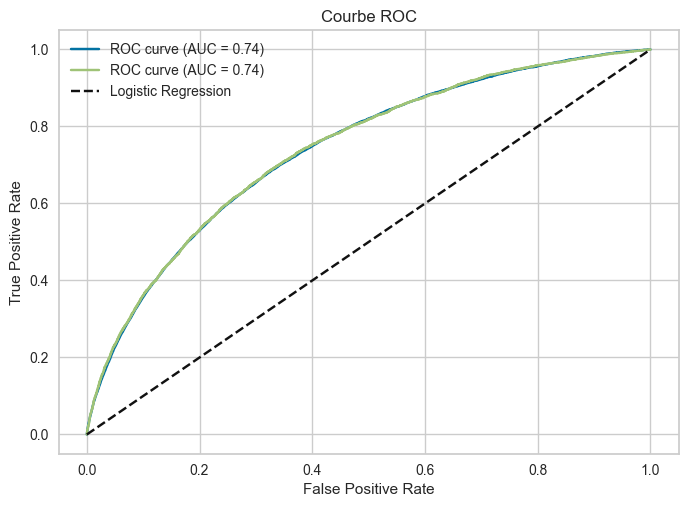

In [58]:
from sklearn.metrics import confusion_matrix

# Entraînement du modèle de régression logistique
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# prédiction
y_train_pred = logistic_model.predict(X_train)
y_valid_pred = logistic_model.predict(X_valid)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

# Évaluation des performances sur l'ensemble de validation
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_confusion = confusion_matrix(y_valid, y_valid_pred)
valid_classification = classification_report(y_valid, y_valid_pred)

# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy,2))
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Affichage des résultats de validation
print('Performance sur la base apprentissage')
print('validation Accuracy : ', round(valid_accuracy,2))
print('validation Confusion matrix : \n', valid_confusion)
print('validation Classification report : \n', valid_classification)

# Calcul et affichage de la courbe ROC, train
y_train_proba = logistic_model.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = roc_auc_score(y_train, y_train_proba)

# Calcul et affichage de la courbe ROC, validation
y_valid_proba = logistic_model.predict_proba(X_valid)[:, 1]
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_proba)
roc_auc_valid = roc_auc_score(y_valid, y_valid_proba)

plt.figure()
plt.plot(fpr_train, tpr_train, label=f"ROC curve (AUC = {roc_auc_train:.2f})")
plt.plot(fpr_valid, tpr_valid, label=f"ROC curve (AUC = {roc_auc_valid:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend(loc="best")
plt.show()

### Les résultats du modèle nous montre que le modèle ne détecte pas la classe minoritaire(la classe 1). le Recall de cette classe vaut 0. Pour résoudre ce problème, il faudra réequilibrer les classes de la variable cible. Nous pouvons utiliser des techniques comme le sur-échantillonnage (SMOTE).

#

### **1.2 Amélioration du Modèle(régression logistique): Equilibrage des classes(SMOTE)**

Le temps exécution du modèle régréssion logistique est: 2.947589874267578
Performance sur la base apprentissage
Train Accuracy :  0.7
Train Confusion matrix : 
 [[156597  69551]
 [ 68209 157939]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.70      0.69      0.69    226148
           1       0.69      0.70      0.70    226148

    accuracy                           0.70    452296
   macro avg       0.70      0.70      0.70    452296
weighted avg       0.70      0.70      0.70    452296

Performance sur la base apprentissage
validation Accuracy :  0.69
validation Confusion matrix : 
 [[39319 17219]
 [ 1707  3258]]
validation Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     56538
           1       0.16      0.66      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighte

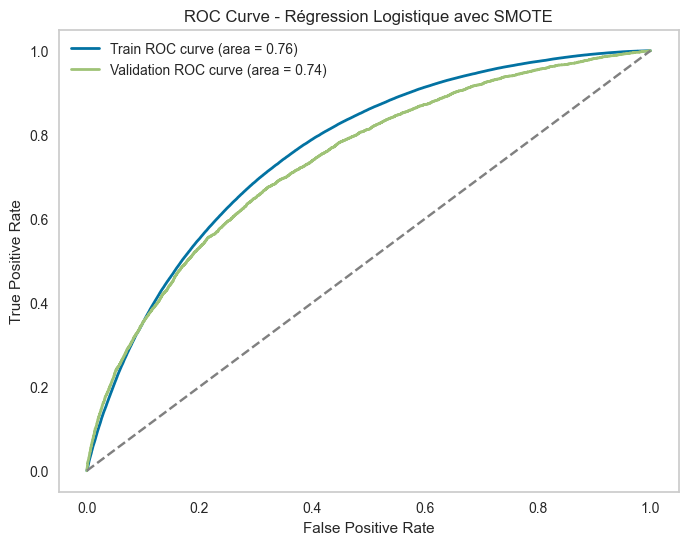

In [59]:
# Réimporter les bibliothèques nécessaires
from imblearn.over_sampling import SMOTE
import time

# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Entraîner la régression logistique avec smote
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
# Début de l'exécution du programme
start_time_RL = time.time()
log_reg_smote.fit(X_train_smote, y_train_smote)
# fin d'exécution
end_time_RL = time.time()
# Temps d'exécution total
execution_time_RL = end_time_RL - start_time_RL
print("Le temps exécution du modèle régréssion logistique est:", execution_time_RL)

# Prédictions et probabilités sur l'ensemble de d'entrainement
y_train_pred_smote = log_reg_smote.predict(X_train_smote)
y_train_prob_smote = log_reg_smote.predict_proba(X_train_smote)[:, 1]
# Prédictions et probabilités sur l'ensemble de validation
y_valid_pred_smote = log_reg_smote.predict(X_valid)
y_valid_prob_smote = log_reg_smote.predict_proba(X_valid)[:, 1]

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train_smote, y_train_pred_smote)
train_confusion = confusion_matrix(y_train_smote, y_train_pred_smote)
train_classification = classification_report(y_train_smote, y_train_pred_smote)
# Évaluation des performances sur l'ensemble de validation
valid_accuracy = accuracy_score(y_valid, y_valid_pred_smote)
valid_confusion = confusion_matrix(y_valid, y_valid_pred_smote)
valid_classification = classification_report(y_valid, y_valid_pred_smote)


# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy,2))
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)
# Affichage des résultats de validation
print('Performance sur la base apprentissage')
print('validation Accuracy : ', round(valid_accuracy,2))
print('validation Confusion matrix : \n', valid_confusion)
print('validation Classification report : \n', valid_classification)

# Calcul et affichage de la courbe ROC, train
y_train_prob_smote = log_reg_smote.predict_proba(X_train_smote)[:, 1]
fpr_train_smote, tpr_train_smote,_ = roc_curve(y_train_smote, y_train_prob_smote)
roc_auc_train_smote = roc_auc_score(y_train_smote, y_train_prob_smote)

# Calcul et affichage de la courbe ROC, validation
y_valid_proba_smote = log_reg_smote.predict_proba(X_valid)[:, 1]
fpr_valid_smote, tpr_valid_smote,_ = roc_curve(y_valid, y_valid_prob_smote)
roc_auc_valid_smote = roc_auc_score(y_valid, y_valid_prob_smote)


plt.figure(figsize=(8, 6))
plt.plot(fpr_train_smote, tpr_train_smote,label='Train ROC curve (area = %0.2f)' % roc_auc_train_smote, linewidth=2)
plt.plot(fpr_valid_smote, tpr_valid_smote, label='Validation ROC curve (area = %0.2f)' % roc_auc_valid_smote, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Régression Logistique avec SMOTE")
plt.legend(loc="best")
plt.grid()
plt.show()

- **Conclusion**

### On remarque le modèle à subit une nette amélioration avec une recall de la classe minoritaire qui passe de 0 à 0,66. Mais on observe une précision très faible de la classe minoritaire de l'ordre de 0,16

#



## **2. Modélisation de l'arbre de classification**

## **2.1 Construction de l'arbre**

In [60]:
from sklearn.tree import DecisionTreeClassifier
import time

# Construction de l'arbre de décision
tree = DecisionTreeClassifier(random_state=42)
start_time_DT = time.time()
tree.fit(X_train, y_train)
end_time_DT = time.time()
execution_time_DT = end_time_DT - start_time_DT
print("Le temps exécution du modèle arbre de décision est:", round(execution_time_DT,2))

Le temps exécution du modèle arbre de décision est: 9.81


### Visualisation de l'arbre

In [61]:
# plt.figure(figsize=(40,30))
# plot_tree(tree, feature_names=X.columns)
# plt.show()

### Evaluation des performance de l'arbre

In [62]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)

# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

# Prédictions sur l'ensemble de validation
y_valid_pred = tree.predict(X_valid)

# Évaluation des performances sur l'ensemble de validation
print('Performance sur la base validation')
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_confusion = confusion_matrix(y_valid, y_valid_pred)
valid_classification = classification_report(y_valid, y_valid_pred)

print('validation Accuracy : ', valid_accuracy)
print('validation Confusion matrix : \n', valid_confusion)
print('validation Classification report : \n', valid_classification)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[226148      0]
 [     0  19860]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    226148
           1       1.00      1.00      1.00     19860

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008

Performance sur la base validation
validation Accuracy :  0.8521698128546575
validation Confusion matrix : 
 [[51569  4969]
 [ 4123   842]]
validation Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92     56538
           1       0.14      0.17      0.16      4965

    accuracy                           0.85     61503
   macro avg       0.54      0.54      0.54     61503
weighted avg       0.86      0.85      0.86     61503



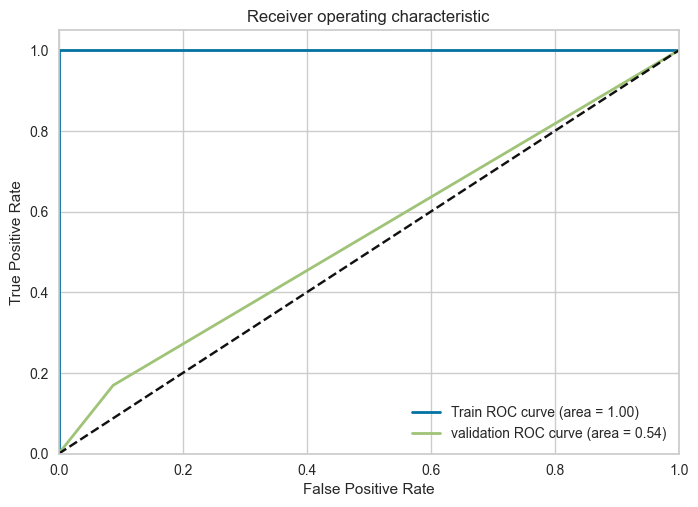

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)
y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de Validation
y_valid_pred = tree.predict(X_valid)
y_valid_prob = tree.predict_proba(X_valid)[:, 1]


# Courbe ROC pour la base train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Courbe ROC pour la base Validation
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_prob)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid, label='validation ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

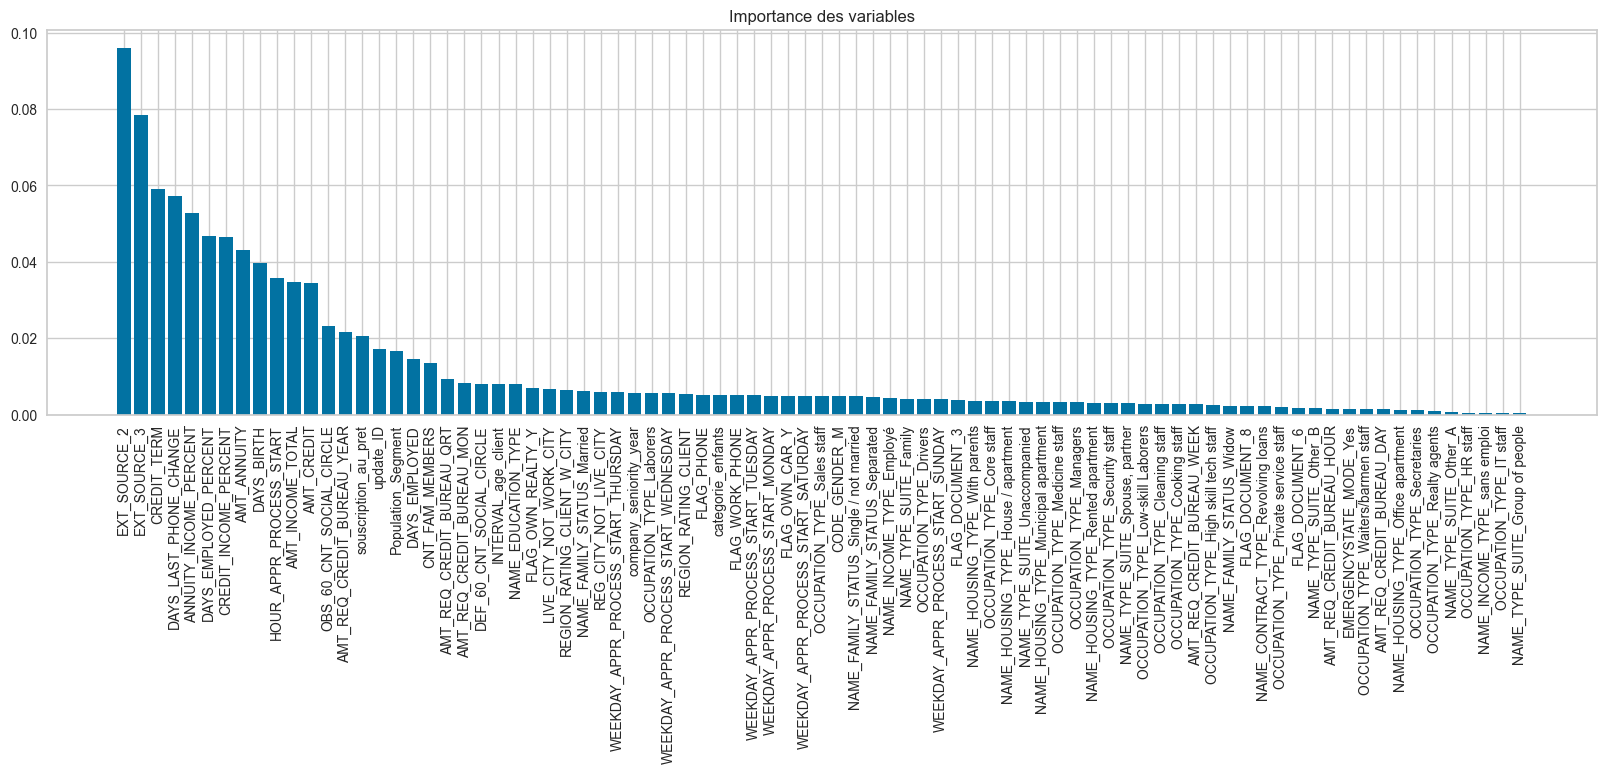

In [64]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

### 2.2 Optimisation de l'arbre de décision

L'optimisation de l'arbre de régression consiste à trouver les paramètres optimaux qui permettent de construire un arbre qui généralise bien sur de nouvelles données. Voici les paramètres que nous pouvons optimiser pour l'arbre de régression :

- criterion : le critère de sélection des attributs. Les critères supportés sont "mse" pour l'erreur quadratique moyenne et "friedman_mse" pour l'erreur quadratique moyenne de Friedman.
- splitter : la stratégie de division des nœuds. Les stratégies supportées sont "best" pour choisir la meilleure division et "random" pour choisir une division aléatoire.
- max_depth : la profondeur maximale de l'arbre. Si None, les nœuds sont étendus jusqu'à ce que toutes les feuilles contiennent moins d'échantillons que min_samples_split. Une valeur élevée de profondeur maximale provoque un surajustement, et une valeur basse provoque un sous-ajustement.
Dans scikit-learn, l'optimisation de l'arbre de régression est effectuée par pré-élagage. La profondeur maximale de l'arbre peut être utilisée comme variable de contrôle pour le pré-élagage. En réduisant la profondeur maximale, nous pouvons contrôler la complexité de l'arbre et éviter le surajustement.

Il est également possible d'essayer d'autres critères de sélection d'attributs, tels que l'erreur absolue moyenne. Il est recommandé d'utiliser la validation croisée pour trouver les meilleurs paramètres pour l'arbre de régression.

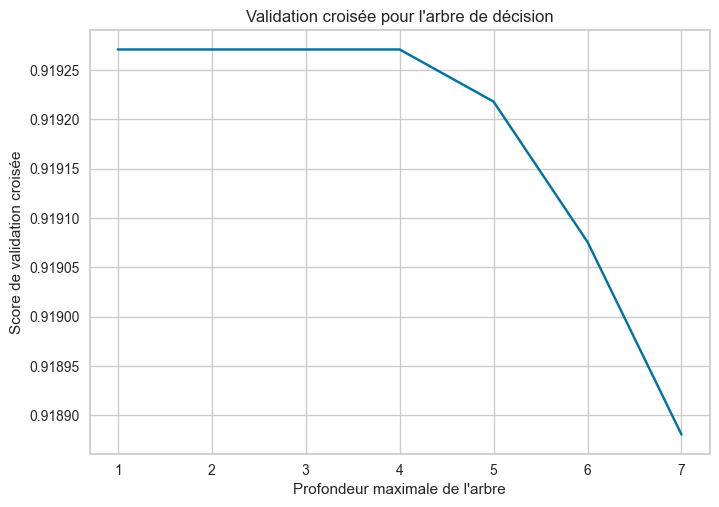

In [65]:
# Liste des profondeurs maximales à tester
max_depths = range(1, 8)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_train, y_train, cv=10)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

In [66]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 1


In [67]:
# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [68]:
DecisionTreeClassifier(max_depth=1, random_state=42)

DecisionTreeClassifier(max_depth=1, random_state=42)

### Visualisation de l'arbre

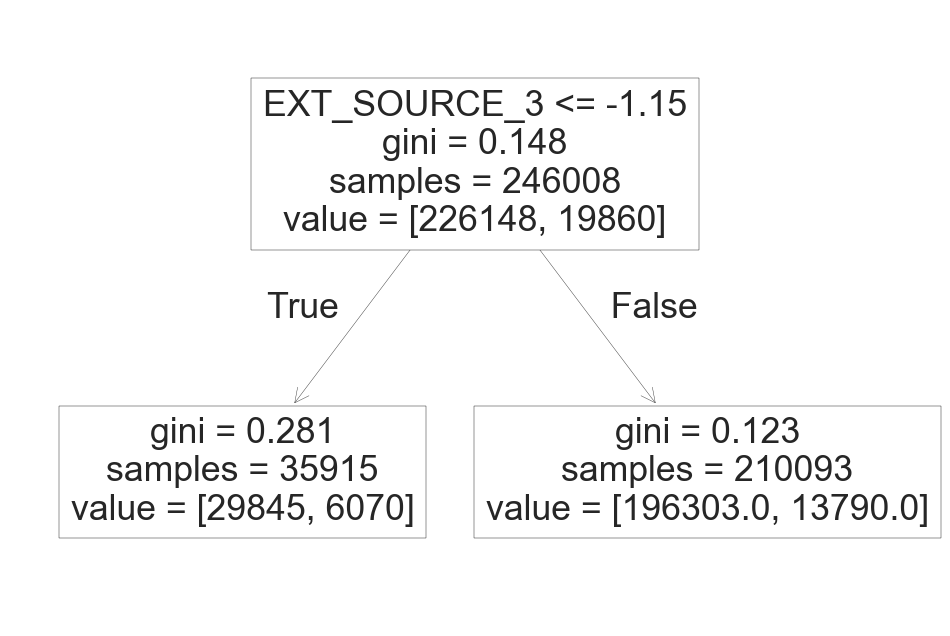

In [69]:
plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=X.columns)
plt.show()

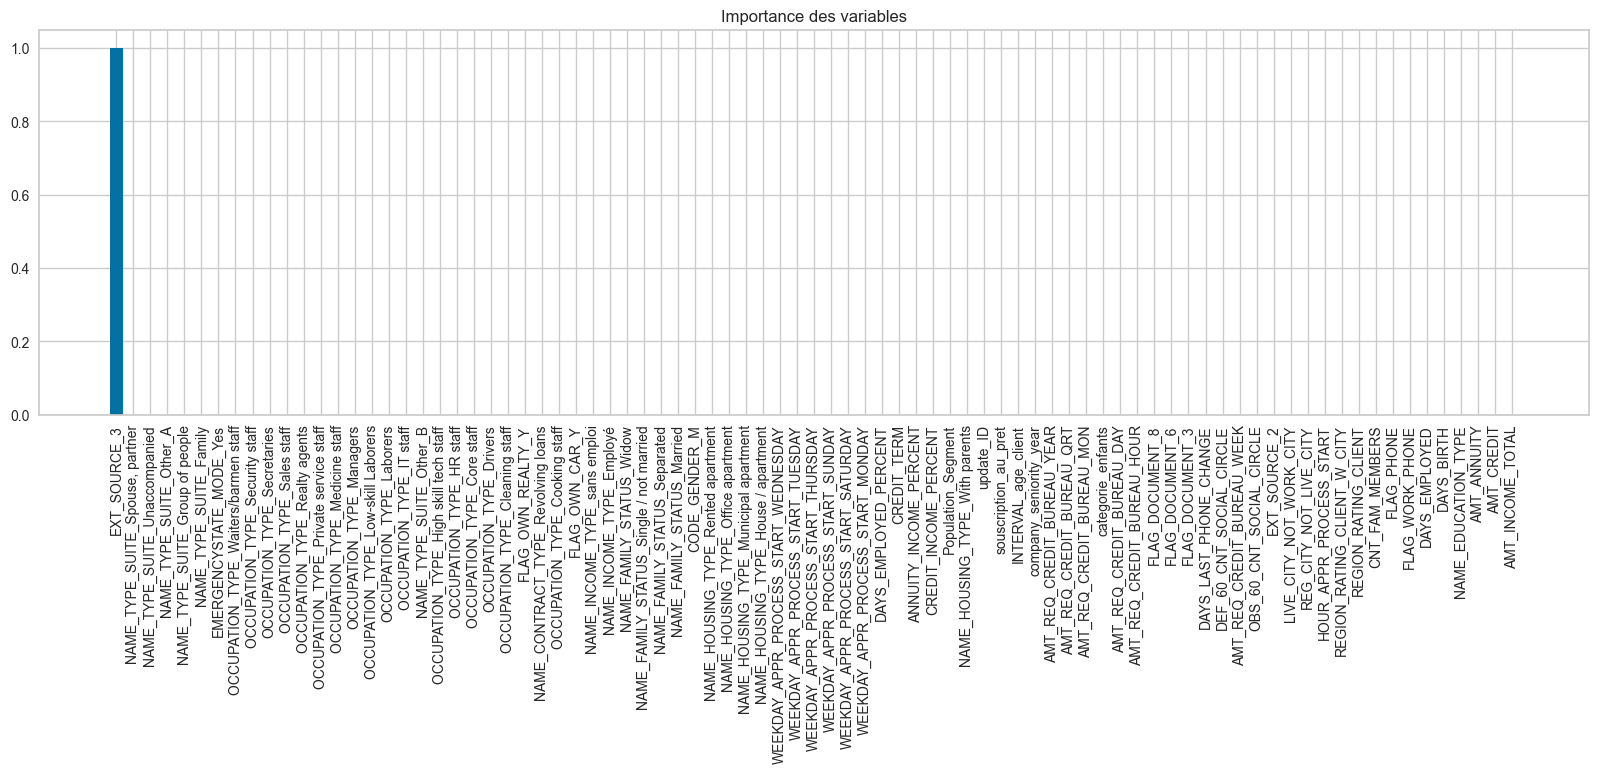

In [70]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

## **Performance de l'arbre optimal**

## Prédictions sur l'ensemble d'entraînement

In [71]:
y_train_pred = tree.predict(X_train)

### Évaluation des performances sur l'ensemble d'entraînement

In [72]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification = classification_report(y_train, y_train_pred)

print('Performance sur la base apprentissage')
print('Train Accuracy : ', train_accuracy)
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)

Performance sur la base apprentissage
Train Accuracy :  0.9192709180189262
Train Confusion matrix : 
 [[226148      0]
 [ 19860      0]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    226148
           1       0.00      0.00      0.00     19860

    accuracy                           0.92    246008
   macro avg       0.46      0.50      0.48    246008
weighted avg       0.85      0.92      0.88    246008



c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## Prédictions sur l'ensemble de Validation

In [73]:
y_valid_pred = tree.predict(X_valid)

## Évaluation des performances sur l'ensemble de validation

In [74]:
print('Performance sur la base test')
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
valid_confusion = confusion_matrix(y_valid, y_valid_pred)
valid_classification = classification_report(y_valid, y_valid_pred)

print('valid Accuracy : ', valid_accuracy)
print('valid Confusion matrix : \n', valid_confusion)
print('valid Classification report : \n', valid_classification)

Performance sur la base test
valid Accuracy :  0.9192722306228964
valid Confusion matrix : 
 [[56538     0]
 [ 4965     0]]
valid Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

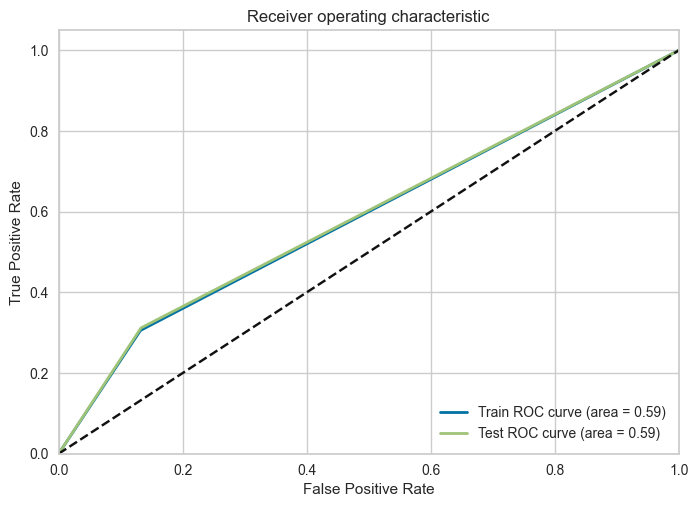

In [75]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)
y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de test
y_valid_pred = tree.predict(X_valid)
y_valid_prob = tree.predict_proba(X_valid)[:, 1]


# Courbe ROC pour la base train
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Courbe ROC pour la base valid
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_prob)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob)

plt.figure()
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid, label='Test ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

- **Conclusion**

##### Les resultats du modele n'est pas performant et tres desequilibrer(recall)
- **Matrix de confusion**
 - un recall de **0**( incapacité à prédire les valeurs positives 1)
 - une AUC de 0.59 (prédiction aléatoire)

##

## **3. Forêt Aléatoire**

Ici le modèle construit une "forêt" composée de plusieurs arbres de décision, et la décision finale est obtenue en agrégeant les prédictions de tous les arbres.
Pour un problème de classification, chaque arbre vote pour une classe, et la classe majoritaire est choisie (mode des votes)

### 3.1 Modèle RandomForetclassifier

In [76]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']

# Standardisation des données
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
X_test = scaler.transform(test_encoded)

# Diviser la base de données en train et test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

Création et entraînement du modèle de forêt aléatoire

In [77]:
random_forest = RandomForestClassifier(oob_score=True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [78]:
RandomForestClassifier(oob_score=True)

RandomForestClassifier(oob_score=True)

## Prédiction sur la base d'apprentissage et la base de validation

In [79]:
# Prédire les classes sur les ensembles d'entraînement et de validation
y_train_pred_fa = random_forest.predict(X_train)
y_valid_pred_fa = random_forest.predict(X_valid)

## Evaluation des performances du modèle

In [80]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred_fa)
validation_accuracy = accuracy_score(y_valid, y_valid_pred_fa)

train_auc = roc_auc_score(y_train, y_train_pred_fa)
validation_auc = roc_auc_score(y_valid, y_valid_pred_fa)

train_recall = recall_score(y_train, y_train_pred_fa)
validation_recall = recall_score(y_valid, y_valid_pred_fa)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de validation': [validation_accuracy, validation_auc, validation_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de validation
0  Accuracy                 0.999967                0.919678
1       AUC                 0.999799                0.501249
2    Recall                 0.999598                0.002698


##

### - Ensemble d'entraînement : 0.999655 (≈ 99.97%)

Le modèle a une excellente capacité à distinguer les classes sur l'ensemble d'entraînement.
### - Ensemble de validation : 0.500202 (≈ 50.02%)
Un AUC de 0.5 est équivalent à un modèle aléatoire (aucune capacité à différencier les classes). Cela montre que le modèle ne fonctionne pas du tout sur l'ensemble de validation. Cela peut indiquer un problème sérieux, comme un surapprentissage massif, des données de validation mal préparées ou un déséquilibre entre les classes.

### - En Observant le Recall de l'ensemble d'entrainement(0.99) contre celui de l'ensemble de validation(0.0004), on peut dire qu'il y'a overfiting

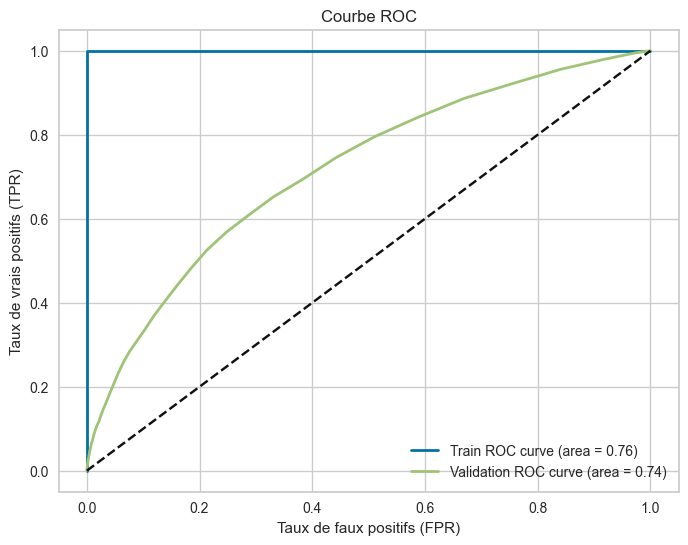

In [81]:
# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_valid_prob = random_forest.predict_proba(X_valid)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
valid_fpr, valid_tpr, _ = roc_curve(y_valid, y_valid_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Train ROC curve (area = %0.2f)' % roc_auc_train_smote, linewidth=2)
plt.plot(valid_fpr, valid_tpr, label='Validation ROC curve (area = %0.2f)' % roc_auc_valid_smote, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

## Analyse de l'importance des variables

Importance des variables :
                           Variable  Importance
0                      EXT_SOURCE_2    0.074874
1                      EXT_SOURCE_3    0.068192
2                       CREDIT_TERM    0.050905
3            ANNUITY_INCOME_PERCENT    0.049367
4             CREDIT_INCOME_PERCENT    0.048387
..                              ...         ...
78      OCCUPATION_TYPE_Secretaries    0.000686
79    OCCUPATION_TYPE_Realty agents    0.000591
80         OCCUPATION_TYPE_IT staff    0.000352
81  NAME_TYPE_SUITE_Group of people    0.000305
82         OCCUPATION_TYPE_HR staff    0.000267

[83 rows x 2 columns]



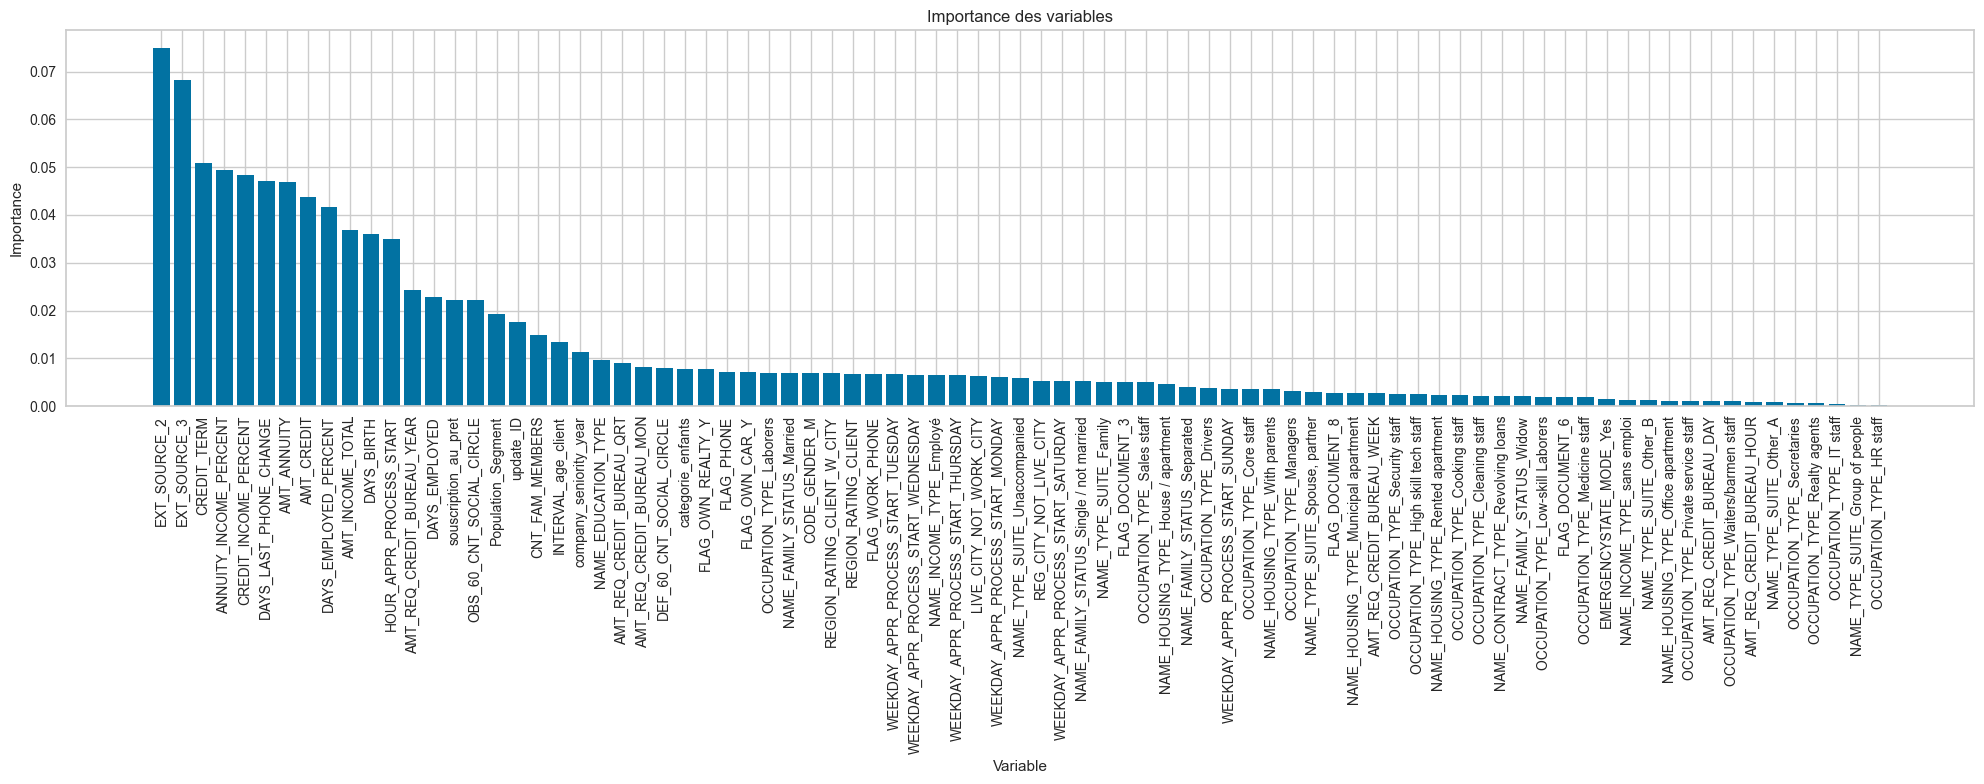

In [82]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
# importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
# importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

importance_df = pd.DataFrame({'Variable': train_encoded.drop(columns=['TARGET']).columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)


# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(20, 8))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

### Minorité des classes dans les différents modèles

In [83]:
# Pourcentage de la minorité correctement classée

def return_minority_perc(y_true, y_pred):
    minority_total = np.sum(y_true)
    if np.where(y_true == 1):
        minority_correct = np.sum(np.where(y_pred == 1, 1, 0))
    minority_perc = minority_correct / minority_total
    return minority_perc

print(f"Pourcentage de la minorité correctement classée, Random Forest validation : {return_minority_perc(y_valid, random_forest.predict(X_valid)):.2%}")
print(f"Pourcentage de la minorité correctement classée, Logistic Regression validation : {return_minority_perc(y_valid, logistic_model.predict(X_valid)):.2%}")

Pourcentage de la minorité correctement classée, Random Forest validation : 0.50%
Pourcentage de la minorité correctement classée, Logistic Regression validation : 1.90%


#

### **3.2 Amélioration du modèle en rééquilibrant les classes(Méthode SMOTE)**



In [84]:
# Réimporter les bibliothèques nécessaires
from imblearn.over_sampling import SMOTE

# SMOTE
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Entraîner le RandomForestClassifier sur les données équilibrées
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

### Prédiction

In [85]:
# Tester le modèle sur l'ensemble d'entrainement
y_train_pred_smote_rf = rf.predict(X_train_smote)
# Tester le modèle sur l'ensemble de validation
y_valid_pred_smote_rf = rf.predict(X_valid)

# probabilités sur l'ensemble de d'entrainement
y_train_prob_smote_rf = rf.predict_proba(X_train_smote)[:, 1]
# probabilités sur l'ensemble de validation
y_valid_prob_smote_rf = rf.predict_proba(X_valid)[:, 1]

### Performance du modèle avec smote

In [86]:
# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy_rf = accuracy_score(y_train_smote, y_train_pred_smote_rf)
train_confusion_rf = confusion_matrix(y_train_smote, y_train_pred_smote_rf)
train_classification_rf = classification_report(y_train_smote, y_train_pred_smote_rf)
# Évaluation des performances sur l'ensemble de validation
valid_accuracy_rf = accuracy_score(y_valid, y_valid_pred_smote_rf)
valid_confusion_rf = confusion_matrix(y_valid, y_valid_pred_smote_rf)
valid_classification_rf = classification_report(y_valid, y_valid_pred_smote_rf)

### Affichage des résultats

In [87]:
# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy_rf,2))
print('Train Confusion matrix : \n', train_confusion_rf)
print('Train Classification report : \n', train_classification_rf)
# Affichage des résultats de validation
print('Performance sur la base apprentissage')
print('validation Accuracy : ', round(valid_accuracy_rf,2))
print('validation Confusion matrix : \n', valid_confusion_rf)
print('validation Classification report : \n', valid_classification_rf)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[197845      0]
 [     3 197842]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690

Performance sur la base apprentissage
validation Accuracy :  0.92
validation Confusion matrix : 
 [[84617   224]
 [ 7308   105]]
validation Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.32      0.01      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.62      0.51      0.49     92254
weighted avg       0.87      0.92      0.88     92254



### Courbe de ROC

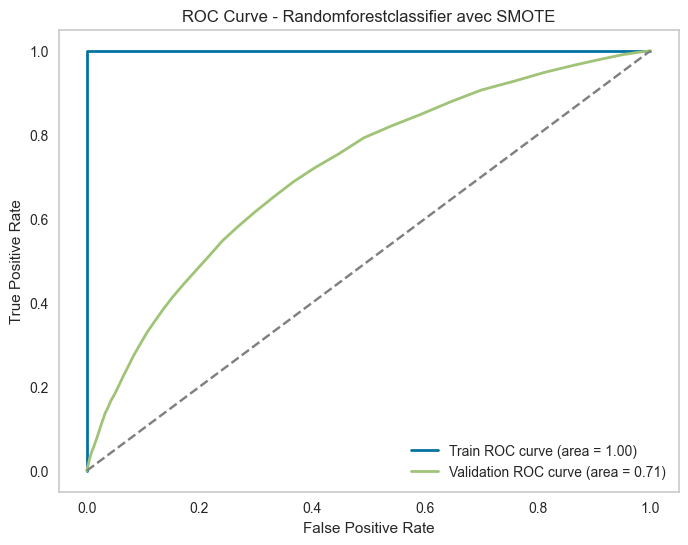

In [88]:
# Calcul et affichage de la courbe ROC, train
fpr_train_smote_rf, tpr_train_smote_rf,_ = roc_curve(y_train_smote, y_train_prob_smote_rf)
roc_auc_train_smote_rf = roc_auc_score(y_train_smote, y_train_prob_smote_rf)

# Calcul et affichage de la courbe ROC, validation
fpr_valid_smote_rf, tpr_valid_smote_rf,_ = roc_curve(y_valid, y_valid_prob_smote_rf)
roc_auc_valid_smote_rf = roc_auc_score(y_valid, y_valid_prob_smote_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train_smote_rf, tpr_train_smote_rf ,label='Train ROC curve (area = %0.2f)' % roc_auc_train_smote_rf, linewidth=2)
plt.plot(fpr_valid_smote_rf, tpr_valid_smote_rf ,label='Validation ROC curve (area = %0.2f)' % roc_auc_valid_smote_rf, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Randomforestclassifier avec SMOTE")
plt.legend(loc="best")
plt.grid()
plt.show()

#

- **Conclusion**

##### On constate que les clients en difficulté de paiement sont très minoritères dans les données d'entraînement et test avec un pourcentage **8.1%** ce qui affecte considérablement les performances du modèle

**Matrix de confusion**
 - un recall de **0**( incapacité à prédire les valeurs positives 1)
##### Les resultats du modele n'est pas performant et tres desequilibrer(recall)

#  

## **4. Light Gradient Boosted Machine(LightGBM)**

In [89]:
#conda install lightgbm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [90]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [91]:
import lightgbm as lgb

In [92]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [93]:
# Division en ensemble d'entraînement et de validation
X_train, X_valid, y_train, y_valid = train_test_split(X_scaler, y, test_size=0.2, random_state=42, stratify=y)
print('train_70% set :', X_train.shape)
print('check_30% set :', X_valid.shape)

train_70% set : (246008, 83)
check_30% set : (61503, 83)


### 4.1 Modèle sans optimisation

In [94]:
# Initialisation du modèle Lightgbmclassifier
LGBM_Model = lgb.LGBMClassifier(
                                boosting_type = 'gbdt',
                                objective = 'binary', # indique la classification binaire
                                num_leaves = 31, # nombre maximum de feuille pour les arbres basse
                                learning_rate = 0.05, # taux d'apprentissage
                                feature_fraction = 0.9, # fraction des colonnes utilisées pour chaque itération, utilisée pour combattre le surapprentissage
                                bagging_fraction = 0.8, # fraction des données utilisées pour chaque itération,utilisée pour combattre le surapprentissage
                                bagging_freq = 5,  # fréquence de bagging, utilisée conjointemente avec bagging_fraction
                              )

In [95]:
# Entrainement du modèle
LGBM_Model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.087248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[Lig

LGBMClassifier(bagging_fraction=0.8, bagging_freq=5, feature_fraction=0.9,
               learning_rate=0.05, objective='binary')

In [96]:
# prediction
y_train_pred = LGBM_Model.predict(X_train)
y_valid_pred = LGBM_Model.predict(X_valid)

c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [97]:
# Classificartion des repport
print("\ntrain classification repport :")
print(classification_report(y_train, y_train_pred))
print("\nvalidation classification repport:")
print(classification_report(y_valid, y_valid_pred))


train classification repport :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226148
           1       0.66      0.01      0.02     19860

    accuracy                           0.92    246008
   macro avg       0.79      0.50      0.49    246008
weighted avg       0.90      0.92      0.88    246008


validation classification repport:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.58      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



### 4.2  Courbe de ROC

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


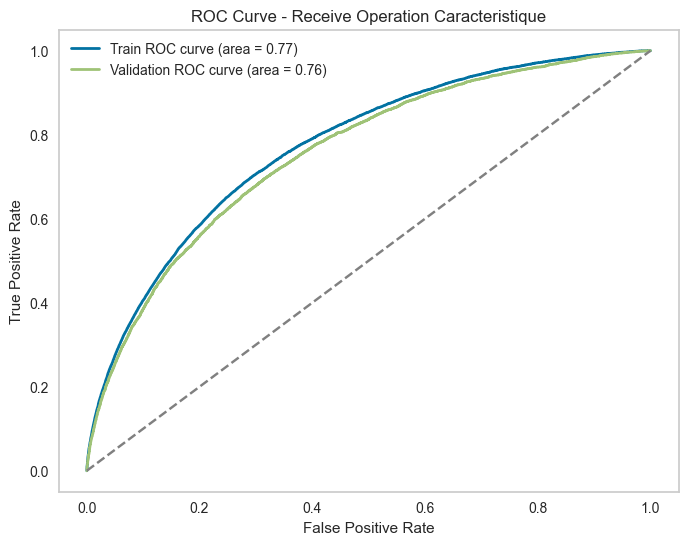

In [98]:
# courbe roc entrainement et validation
y_train_prob = LGBM_Model.predict_proba(X_train)[:, 1]
y_valid_prob = LGBM_Model.predict_proba(X_valid)[:, 1]
# jeu de validation
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob)
# jeu d'entrainement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train ,label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid ,label='Validation ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Receive Operation Caracteristique")
plt.legend(loc="best")
plt.grid()
plt.show()

c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


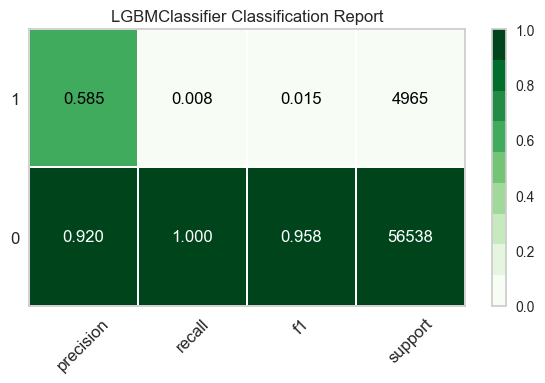

<Axes: title={'center': 'LGBMClassifier Classification Report'}>

In [99]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(LGBM_Model, support=True, cmap='Greens')

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid, y_valid)        # Evaluate the model on the validation data
visualizer.show()

### **Problème**: le Modèle ne détecte pas la classe minoritaire

### 4.2 Equilibrage des classes dans le modèle(SMOTE)

In [100]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [101]:
# Supposons que vous avez un dataset (X, y)
# Diviser les données en train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [102]:
from sklearn.utils.class_weight import compute_class_weight
import lightgbm as lgb

# Calcul des poids des classes
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y_train)
weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Ajouter les poids aux données d'entraînement
sample_weights = y_train.map(weights_dict)
print(sample_weights)

159703    0.543908
79269     0.543908
232615    0.543908
33420     0.543908
88191     0.543908
            ...   
170183    0.543908
31304     0.543908
121193    0.543908
248504    0.543908
301908    6.193733
Name: TARGET, Length: 215257, dtype: float64


In [103]:
import re

# Replace special characters with underscores in column names
X_train = X_train.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))
X_valid = X_valid.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '_', x))

# Recalculate sample_weights with updated column names if necessary
sample_weights = y_train.map(weights_dict)

params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'seed': 42,
    'verbose': -1}

# Create LightGBM Datasets with the modified DataFrames
train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weights)
valid_data = lgb.Dataset(X_valid, label=y_valid, reference=train_data)

# Continue with your LightGBM training process
model = lgb.train(params, train_data, valid_sets=[train_data, valid_data], callbacks=[lgb.early_stopping(stopping_rounds=50)])

# Prédictions validation
y_val_pred = model.predict(X_valid)
y_val_binary = (y_val_pred > 0.5).astype(int)
# Prédictions train
y_train_pred = model.predict(X_train)
y_train_binary = (y_train_pred > 0.5).astype(int)

Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.77381	valid_1's auc: 0.755675


In [104]:
print(type(model))

<class 'lightgbm.basic.Booster'>


### **4.3 Enregistrment du modèle lightGBM**

In [105]:
import pickle

# Sauvegarde avec pickle
with open("modele_lgbm.pkl", 'wb') as file:
    pickle.dump(model, file)

Train Classification report : 
               precision    recall  f1-score   support

    Classe 0       0.96      0.70      0.81    197880
    Classe 1       0.17      0.71      0.27     17377

    accuracy                           0.70    215257
   macro avg       0.57      0.70      0.54    215257
weighted avg       0.90      0.70      0.77    215257

validation Classification report : 
               precision    recall  f1-score   support

    Classe 0       0.96      0.70      0.81     84806
    Classe 1       0.16      0.68      0.26      7448

    accuracy                           0.70     92254
   macro avg       0.56      0.69      0.54     92254
weighted avg       0.90      0.70      0.76     92254



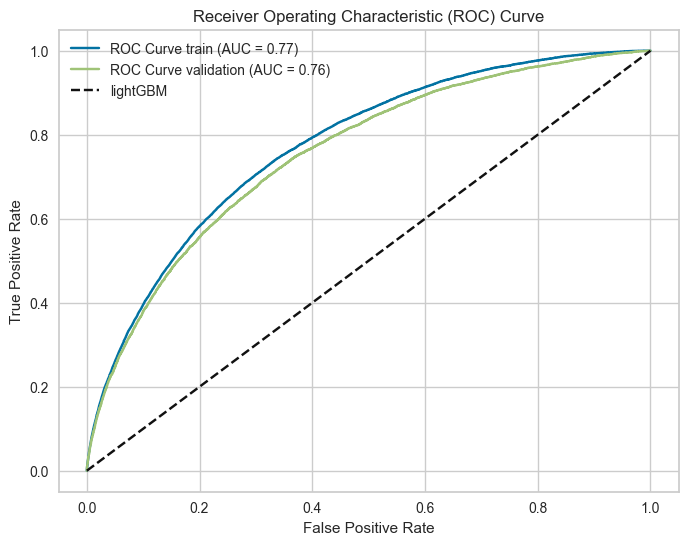

In [106]:
# Évaluation du modèle
classification_rep_valid = classification_report(y_valid, y_val_binary, target_names=['Classe 0', 'Classe 1'])
classification_rep_train = classification_report(y_train, y_train_binary, target_names=['Classe 0', 'Classe 1'])
roc_auc_val = roc_auc_score(y_valid, y_val_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)

# Calcul de la courbe ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_val_pred)

# Affichage des résultats d'entrainement
print('Train Classification report : \n', classification_rep_train)
print('validation Classification report : \n', classification_rep_valid)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'ROC Curve train (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_valid, tpr_valid, label=f'ROC Curve validation (AUC = {roc_auc_valid:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='lightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

### **ANALYSE DES VARIABLES IMPORTANTES**

Importance des variables :
                           Variable  Importance
0                       CREDIT_TERM         633
1                      EXT_SOURCE_3         318
2                      EXT_SOURCE_2         281
3                        DAYS_BIRTH         187
4                       AMT_ANNUITY         138
..                              ...         ...
78          EMERGENCYSTATE_MODE_Yes           0
79  NAME_TYPE_SUITE_Group of people           0
80          NAME_TYPE_SUITE_Other_A           0
81          NAME_TYPE_SUITE_Other_B           0
82  NAME_TYPE_SUITE_Spouse, partner           0

[83 rows x 2 columns]



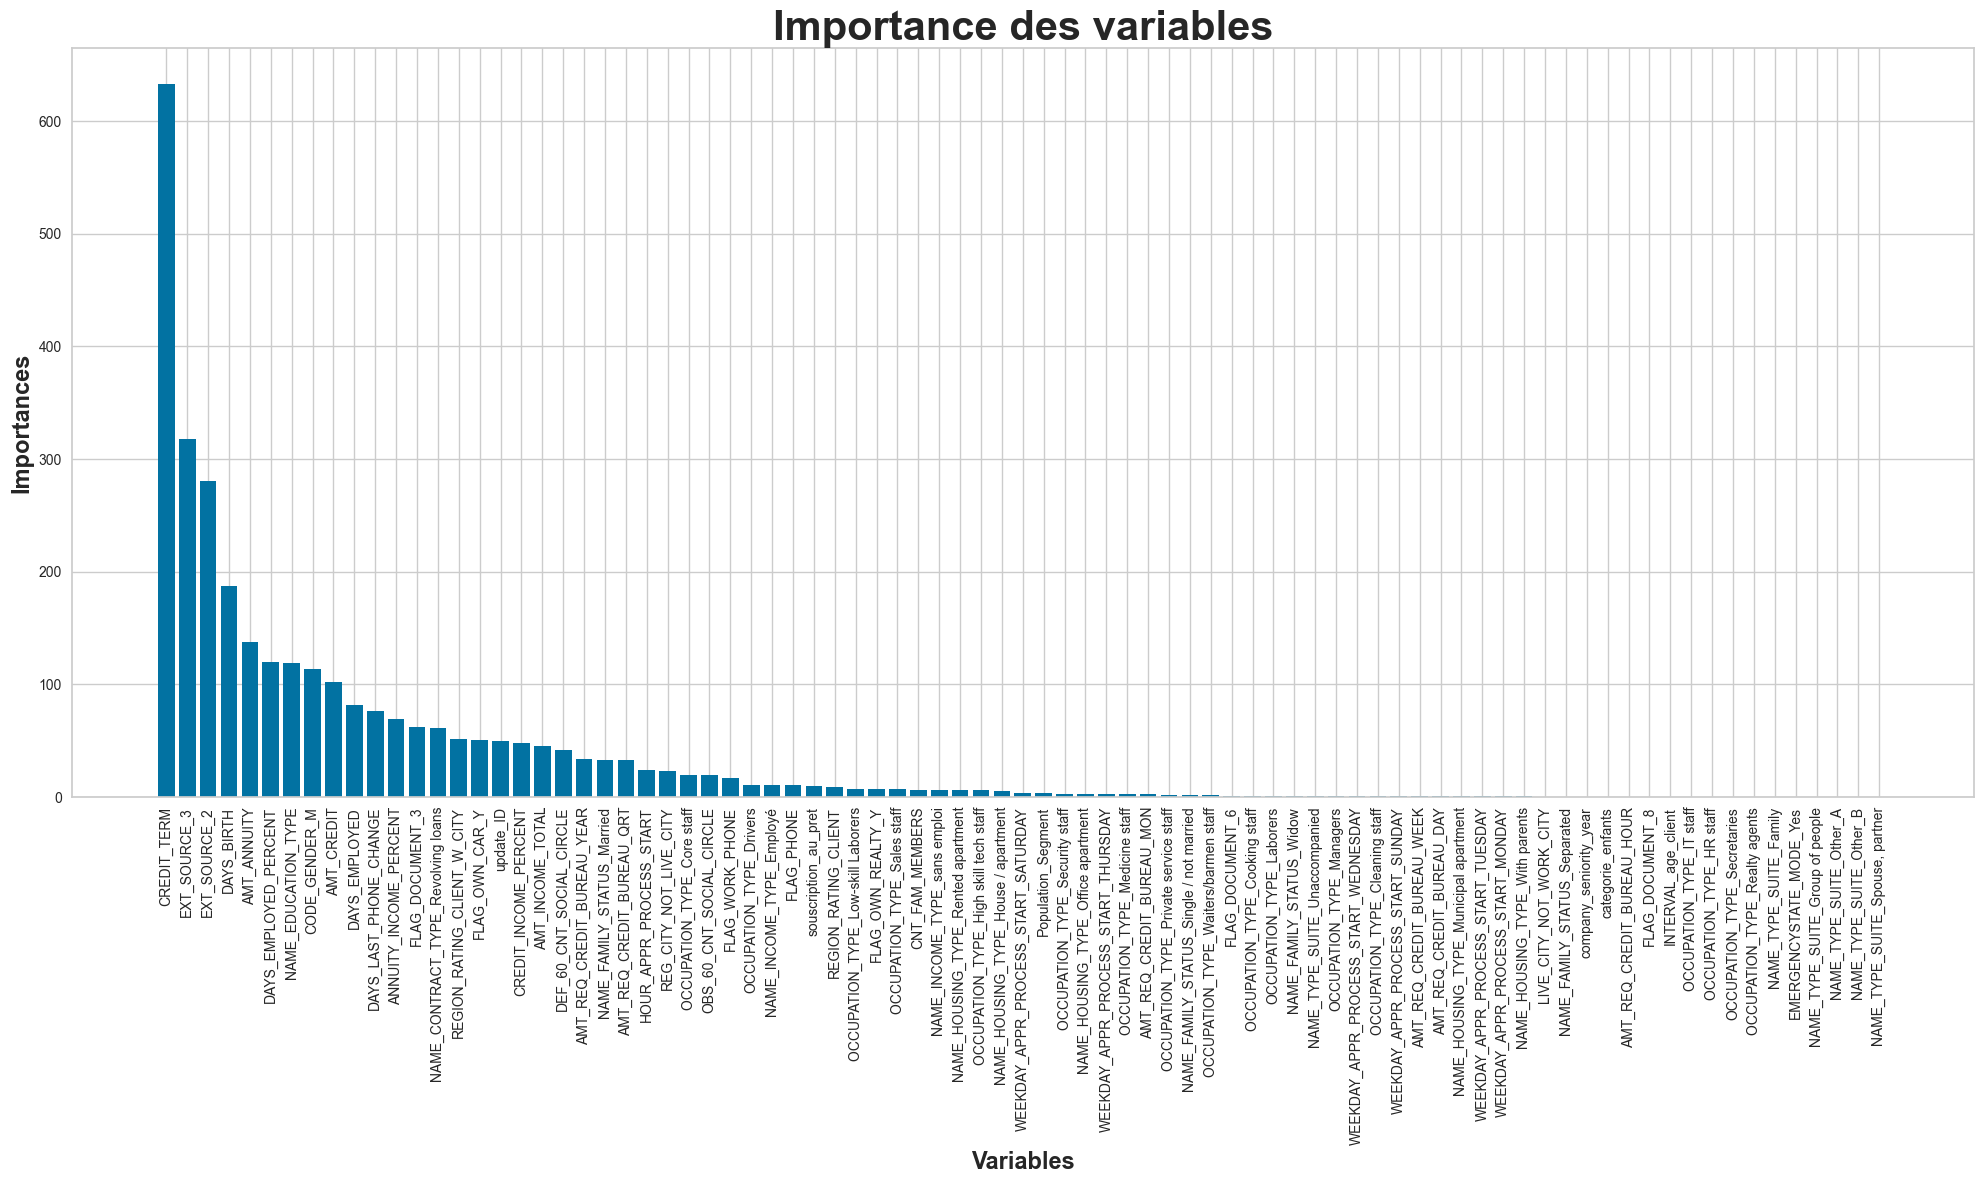

In [107]:
# Obtenir l'importance des variables
importance = model.feature_importance()

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': train_imputation.drop(columns=['TARGET']).columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(20, 12))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variables', fontsize = 17, fontweight = 'bold')
plt.ylabel('Importances', fontsize = 17, fontweight = 'bold')
plt.title('Importance des variables', fontsize = 30, fontweight = 'bold')
plt.tight_layout()
plt.show()

In [108]:
model.feature_name()

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_EDUCATION_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'categorie_enfants',
 'INTERVAL_age_client',
 'company_seniority_year',
 'souscription_au_pret',
 'update_ID',
 'Population_Segment',
 'CREDIT_INCOME_PERCENT',
 'ANNUITY_INCOME_PERCENT',
 'CREDIT_TERM',
 'DAYS_EMPLOYED_PERCENT',
 'WEEKDAY_APPR_PROCESS_START_MONDAY',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'WEEKDAY_APPR_PROCESS_STA

- **Conclusion**

Ce modele est beaucoup plus equilibrer et performant comme le montre </br>
la matrice de confusion

#


##  **5. Modèle XGBoost**

### 5.1 Modele sans optimisation

In [111]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [112]:
# Diviser les données en train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [113]:
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
start_time_xgb = time.time()
xgb_model.fit(X_train, y_train)
end_time_xgb = time.time()
training_time_xgb = end_time_xgb - start_time_xgb
print(f"Temps d'entraînement du modèle XGBoost : {training_time_xgb:.2f} secondes")

c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:13:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Temps d'entraînement du modèle XGBoost : 2.82 secondes


### **Prédiction**

In [114]:
# Prediction sur les données d'entrainement
y_pred_train = xgb_model.predict(X_train)
# Prediction sur les données de validation
y_pred_valid = xgb_model.predict(X_valid)

# probabilités sur l'ensemble de d'entrainement
y_train_prob_xgb = xgb_model.predict_proba(X_train)[:, 1]
# probabilités sur l'ensemble de validation
y_valid_prob_xgb = xgb_model.predict_proba(X_valid)[:, 1]

### **Performance du modèle**

In [115]:
# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train, y_pred_train)
train_confusion = confusion_matrix(y_train, y_pred_train)
train_classification = classification_report(y_train, y_pred_train)
# Évaluation des performances sur l'ensemble de validation
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
valid_confusion = confusion_matrix(y_valid, y_pred_valid)
valid_classification = classification_report(y_valid, y_pred_valid)

In [116]:
# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy_rf,2))
print('Train Confusion matrix : \n', train_confusion_rf)
print('Train Classification report : \n', train_classification_rf)
# Affichage des résultats de validation
print('Performance sur la base apprentissage')
print('valid Accuracy : ', round(valid_accuracy_rf,2))
print('valid Confusion matrix : \n', valid_confusion_rf)
print('valid Classification report : \n', valid_classification_rf)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[197845      0]
 [     3 197842]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690

Performance sur la base apprentissage
valid Accuracy :  0.92
valid Confusion matrix : 
 [[84617   224]
 [ 7308   105]]
valid Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.32      0.01      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.62      0.51      0.49     92254
weighted avg       0.87      0.92      0.88     92254



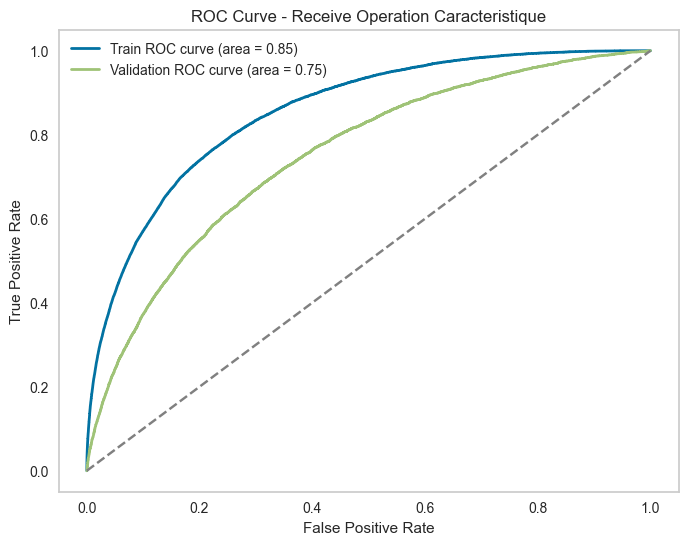

In [117]:
# jeu de validation
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob_xgb)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_xgb)
# jeu d'entrainement
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob_xgb)
roc_auc_train = roc_auc_score(y_train, y_train_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train ,label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid ,label='Validation ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Receive Operation Caracteristique")
plt.legend(loc="best")
plt.grid()
plt.show()

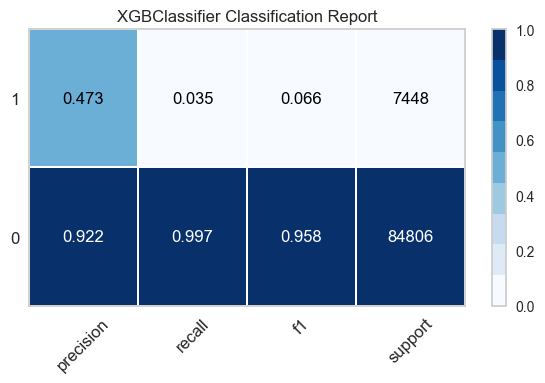

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [118]:
fig, ax = plt.subplots(figsize=(6, 4))

visualizer = ClassificationReport(xgb_model, support=True, cmap='Blues')

visualizer.fit(X_train, y_train)
visualizer.score(X_valid, y_valid)
visualizer.show()

#

### **Probème**: On constate un grand déséquilibre entre les classes, principalement la classe minoritaire(1).
### **Solution**: A partir de la méthode SMOTE nous équilibrerons les différentes classes.

### 5.2 Equilibrage des classes(SMOTE)

c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:13:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


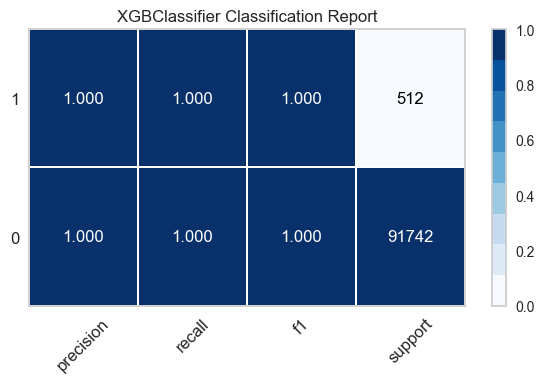

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [119]:
# Réimporter les bibliothèques nécessaires
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# SMOTE
smote = SMOTE(sampling_strategy= 'auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialiser et entraîner le modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

# prediction
y_train_pred = xgb_model.predict(X_train_smote)
y_valid_pred = xgb_model.predict(X_valid)

# Create the ClassificationReport visualizer
fig, ax = plt.subplots(figsize=(6, 4))
visualizer = ClassificationReport(xgb_model, support=True, cmap='Blues')

# Fit and score the visualizer
visualizer.fit(X_train_smote, y_train_pred )
visualizer.score(X_valid, y_valid_pred)
visualizer.show()

## On constate que la méthode SMOTE n'a pas été efficace sur le modèle XGBOOST.


In [120]:
# Prediction sur les données d'entrainement
y_train_pred = xgb_model.predict(X_train_smote)
# Prediction sur les données de validation
y_valid_pred = xgb_model.predict(X_valid)

# probabilités sur l'ensemble de d'entrainement
y_train_prob_xgb = xgb_model.predict_proba(X_train_smote)[:, 1]
# probabilités sur l'ensemble de validation
y_valid_prob_xgb = xgb_model.predict_proba(X_valid)[:, 1]

In [121]:
# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_confusion = confusion_matrix(y_train_smote, y_train_pred)
train_classification = classification_report(y_train_smote, y_train_pred)
# Évaluation des performances sur l'ensemble de validation
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
valid_confusion = confusion_matrix(y_valid, y_pred_valid)
valid_classification = classification_report(y_valid, y_pred_valid)

In [122]:
# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy_rf,2))
print('Train Confusion matrix : \n', train_confusion_rf)
print('Train Classification report : \n', train_classification_rf)
# Affichage des résultats de validation
print('Performance sur la base apprentissage')
print('valid Accuracy : ', round(valid_accuracy_rf,2))
print('valid Confusion matrix : \n', valid_confusion_rf)
print('valid Classification report : \n', valid_classification_rf)

Performance sur la base apprentissage
Train Accuracy :  1.0
Train Confusion matrix : 
 [[197845      0]
 [     3 197842]]
Train Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    197845
           1       1.00      1.00      1.00    197845

    accuracy                           1.00    395690
   macro avg       1.00      1.00      1.00    395690
weighted avg       1.00      1.00      1.00    395690

Performance sur la base apprentissage
valid Accuracy :  0.92
valid Confusion matrix : 
 [[84617   224]
 [ 7308   105]]
valid Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.32      0.01      0.03      7413

    accuracy                           0.92     92254
   macro avg       0.62      0.51      0.49     92254
weighted avg       0.87      0.92      0.88     92254



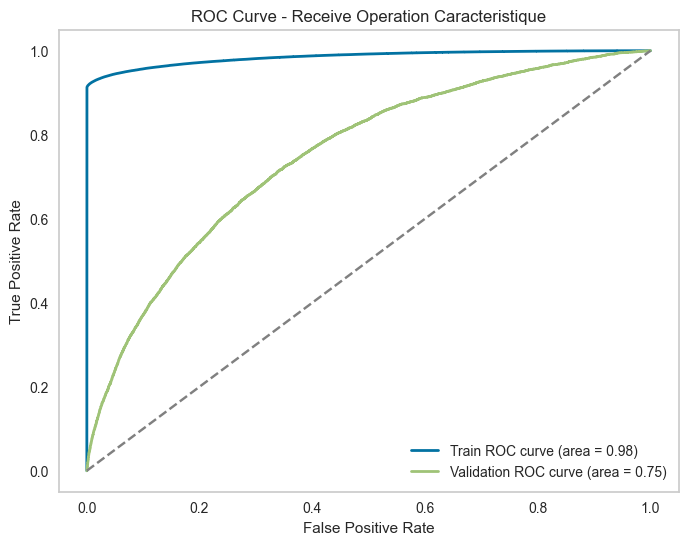

In [123]:
# jeu de validation
fpr_valid, tpr_valid,_ = roc_curve(y_valid, y_valid_prob_xgb)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_xgb)
# jeu d'entrainement
fpr_train, tpr_train,_ = roc_curve(y_train_smote, y_train_prob_xgb)
roc_auc_train = roc_auc_score(y_train_smote, y_train_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train ,label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid ,label='Validation ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Receive Operation Caracteristique")
plt.legend(loc="best")
plt.grid()
plt.show()

In [124]:
# Séparation des features (X) et de la variable cible (y)
X = train_imputation.drop(columns=['TARGET'])
y = train_imputation['TARGET']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [125]:
# Diviser les données en train et validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [126]:
from imblearn.over_sampling import ADASYN

# Application de la méthode ADASYN pour équilibrer les classes
adasyn = ADASYN(random_state=42)
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)

In [127]:
# Initialiser et entraîner le modèle XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
start_time_ad = time.time()
xgb_model.fit(X_train_ad, y_train_ad)
end_time_ad = time.time()
training_time_ad = end_time_ad - start_time_ad
print(f"Temps d'entraînement du modèle XGBoost : {training_time_ad:.2f} secondes")

c:\Users\HP\Documents\projet 7\P7_cloud_deploiement\env_cloud\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:14:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Temps d'entraînement du modèle XGBoost : 5.71 secondes


### Prediction

In [128]:
# Prediction sur les données d'entrainement
y_pred_train = xgb_model.predict(X_train_ad)
# Prediction sur les données de validation
y_pred_valid = xgb_model.predict(X_valid)

# probabilités sur l'ensemble de d'entrainement
y_train_prob_xgb = xgb_model.predict_proba(X_train_ad)[:, 1]
# probabilités sur l'ensemble de validation
y_valid_prob_xgb = xgb_model.predict_proba(X_valid)[:, 1]

### Performance du modèle

In [129]:
# Évaluation des performances sur l'ensemble d'entraînement
train_accuracy = accuracy_score(y_train_ad, y_pred_train)
train_confusion = confusion_matrix(y_train_ad, y_pred_train)
train_classification = classification_report(y_train_ad, y_pred_train)
# Évaluation des performances sur l'ensemble de validation
valid_accuracy = accuracy_score(y_valid, y_pred_valid)
valid_confusion = confusion_matrix(y_valid, y_pred_valid)
valid_classification = classification_report(y_valid, y_pred_valid)

In [130]:
# Affichage des résultats d'entrainement
print('Performance sur la base apprentissage')
print('Train Accuracy : ', round(train_accuracy,2))
print('Train Confusion matrix : \n', train_confusion)
print('Train Classification report : \n', train_classification)
# Affichage des résultats de validation
print('Performance sur la base validation')
print('valid Accuracy : ', round(valid_accuracy,2))
print('valid Confusion matrix : \n', valid_confusion)
print('valid Classification report : \n', valid_classification)

Performance sur la base apprentissage
Train Accuracy :  0.96
Train Confusion matrix : 
 [[197544    336]
 [ 16366 183573]]
Train Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    197880
           1       1.00      0.92      0.96    199939

    accuracy                           0.96    397819
   macro avg       0.96      0.96      0.96    397819
weighted avg       0.96      0.96      0.96    397819

Performance sur la base validation
valid Accuracy :  0.92
valid Confusion matrix : 
 [[84521   285]
 [ 7194   254]]
valid Classification report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     84806
           1       0.47      0.03      0.06      7448

    accuracy                           0.92     92254
   macro avg       0.70      0.52      0.51     92254
weighted avg       0.89      0.92      0.89     92254



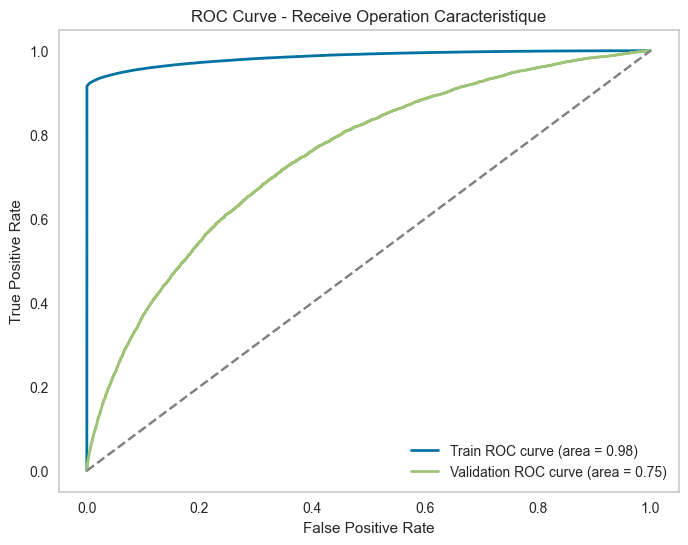

In [131]:
# jeu de validation
fpr_valid, tpr_valid, _ = roc_curve(y_valid, y_valid_prob_xgb)
roc_auc_valid = roc_auc_score(y_valid, y_valid_prob_xgb)
# jeu d'entrainement
fpr_train, tpr_train, _ = roc_curve(y_train_ad, y_train_prob_xgb)
roc_auc_train = roc_auc_score(y_train_ad, y_train_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train ,label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
plt.plot(fpr_valid, tpr_valid ,label='Validation ROC curve (area = %0.2f)' % roc_auc_valid, linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Receive Operation Caracteristique")
plt.legend(loc="best")
plt.grid()
plt.show()

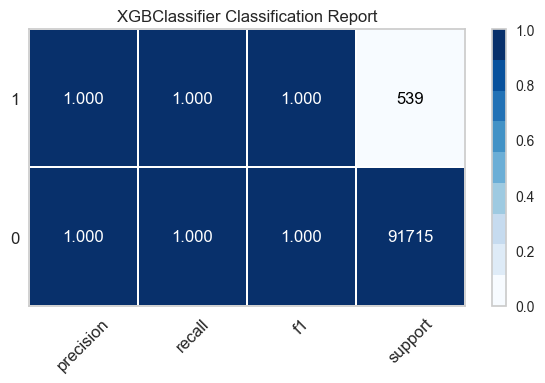

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [132]:
# Create the ClassificationReport visualizer
fig, ax = plt.subplots(figsize=(6, 4))
visualizer = ClassificationReport(xgb_model, support=True, cmap='Blues')

# Fit and score the visualizer
visualizer.fit(X_train_ad, y_train_pred)
visualizer.score(X_valid, y_pred_valid)
visualizer.show()

- **Conclusion**

Ce modele est tres desequilibrer moins performant d'apres les resultats de la matrice de contingence.

###

#### **Conclusion Generale**

Dans la poursuite de notre etude d'implementez un modele de scoring, elle se fera sous la base du **modele lightgbm**.</br>
Ce modele c'est demarque par ces resultats de la matrice de contengince par rapport aux autres modeles.